Problem Set 0 - Images as Functions

1 Input images

a.

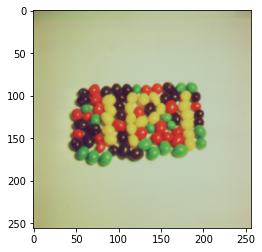

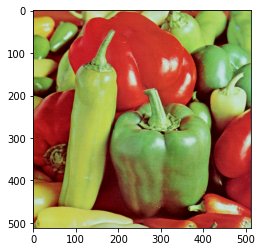

In [1]:
%matplotlib inline
import cv2 as cv
from matplotlib import pyplot as plt

# Image 1: size 256*256
img1 = cv.imread("ps0-1-a-1.png")
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))   

# Image 2: size 512*512
img2 = cv.imread("ps0-1-a-2.png")
plt.figure()
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)) 
plt.show()

2 Color panes

a.

(256, 256, 3)


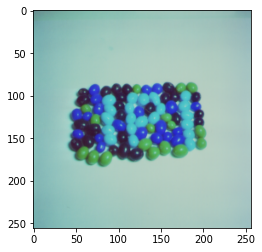

In [2]:
# Imread: BGR order; img1: <class 'numpy.ndarray'>
img1 = cv.imread("ps0-1-a-1.png")
print(img1.shape)

# Swap the red and blue channels
img1_swapped = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
# Can't use cv.imshow in jupyter notebook; must convert from BGR (OpenCV) to RGB (matplotlib) before imshowing with matplotlib
plt.imshow(cv.cvtColor(img1_swapped, cv.COLOR_BGR2RGB))   
plt.show()

b. & c.

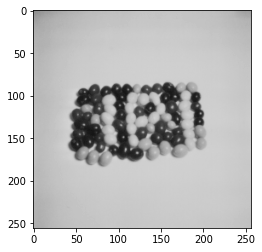

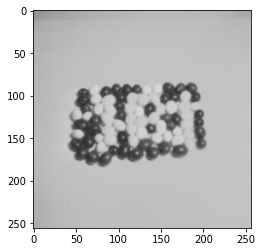

In [3]:
_,M1g,M1r = cv.split(img1)
# Or:
# blue = img1[:,:,0]
# green = img1[:,:,1]
# red = img1[:,:,2]

plt.imshow(M1g, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(M1r, cmap='gray', vmin=0, vmax=255)
plt.show()

d.

Both look like a monochrome image. I would expect a CV algorithm to work equally well on these two.

3 Replacement of Pixels

a.

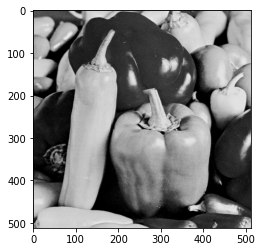

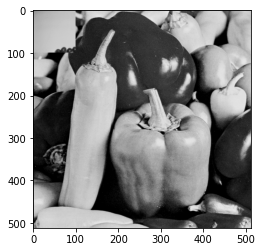

In [4]:
# Suppose "monochrome version" of refers to M1g & M2g
img2 = cv.imread("ps0-1-a-2.png")
_,M2g,_ = cv.split(img2)

plt.imshow(M2g, cmap='gray', vmin=0, vmax=255)
M2g[:100, :100] = M1g[:100, :100]
plt.figure()
plt.imshow(M2g, cmap='gray', vmin=0, vmax=255)
plt.show()

4 Arithmetic and Geometric operation

a.

In [5]:
# These values can be computed with built-in functions of numpy as OpenCV images are also numpy arrays
print(M1g.min(), M1g.max(), M1g.mean(), M1g.std())

19 212 180.64993286132812 44.92847586688289


b.

0.0
1.0
10.0
180.64993286132815


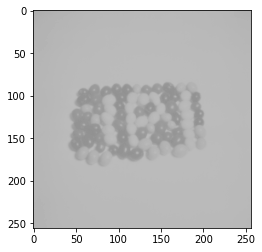

In [6]:
M1g_b = M1g - M1g.mean()
print(M1g_b.mean())
M1g_b /= M1g_b.std()
print(M1g_b.std())
M1g_b *= 10
print(M1g_b.std())
M1g_b += M1g.mean()
print(M1g_b.mean())
plt.imshow(M1g_b, cmap='gray', vmin=0, vmax=255)
plt.show()

c.

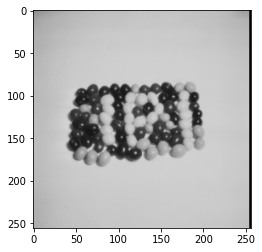

In [7]:
import numpy as np

rows,cols = M1g.shape
M = np.float32([[1,0,-2],[0,1,0]])
M1g_c = cv.warpAffine(M1g,M,(cols,rows))

plt.imshow(M1g_c, cmap='gray', vmin=0, vmax=255)
plt.show()

d.

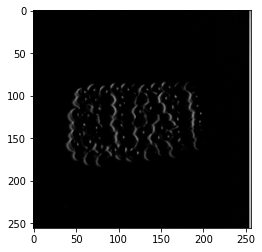

In [8]:
# Negative values are treated as 0
M1g_d = np.multiply(M1g - M1g_c, M1g > M1g_c)  # Element-wise multiplication
plt.imshow(M1g_d, cmap='gray', vmin=0, vmax=255)
plt.show()

5 Noise

a.

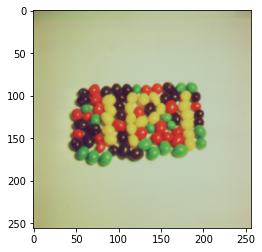

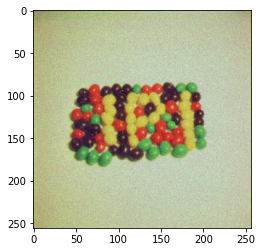

In [9]:
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))

# sigma is the standard deviation of the gaussian noise at each pixel
sigma = 10
# img1[:,:,1] is of type uint8, result of the following line is altomatically casted into uint8
img1[:,:,1] = img1[:,:,1] + np.random.normal(0, sigma, img1[:, :, 1].shape)

plt.figure()
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))   
plt.show()

b.

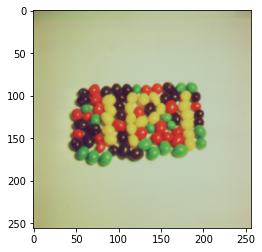

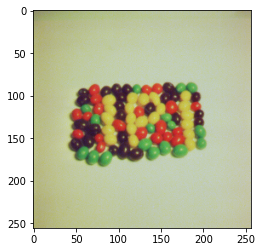

In [10]:
img1 = cv.imread("ps0-1-a-1.png")
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))

sigma = 10
img1[:,:,0] = img1[:,:,0].astype(float) + np.random.normal(0, sigma, img1[:, :, 0].shape)

plt.figure()
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))   
plt.show()

c.

Image with gaussian noise in the blue channel looks better, as human eyes are more sensitive to green than blue, so less sensitive to noise added in the blue channel. 